In [2]:
import os

In [3]:
train_path='/home/deepaksr/project/project_assignment1/data2/data2/train'
valid_path='/home/deepaksr/project/project_assignment1/data2/data2/valid'
test_path='/home/deepaksr/project/project_assignment1/data2/data2/test'
def verify_data(folder):
  for classes in os.listdir(folder):
    class_path=os.path.join(folder,classes)
    if os.path.isdir(class_path):
      images = [i for i in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,i))]
      counter = sum(1 for image in images if image.lower().endswith('.jpg'))
      print(f'class: {classes}')
      print(f'Images: {counter}\n')

print('Training Data:')
verify_data(train_path)
print('Validation Data:')
verify_data(valid_path)
print('Test Data:')
verify_data(test_path)

Training Data:
class: C390
Images: 60

class: KJ600
Images: 30

class: F117
Images: 304

class: J10
Images: 548

class: U2
Images: 272

class: C17
Images: 523

class: E7
Images: 153

class: A400M
Images: 383

class: A10
Images: 578

class: US2
Images: 546

class: Mirage2000
Images: 413

class: F16
Images: 1489

class: F14
Images: 435

class: KC135
Images: 209

class: J20
Images: 606

class: B2
Images: 426

class: XB70
Images: 151

class: Su57
Images: 303

class: JAS39
Images: 482

class: KF21
Images: 85

class: Su24
Images: 284

class: C5
Images: 303

class: WZ7
Images: 70

class: YF23
Images: 118

class: Be200
Images: 220

class: An72
Images: 70

class: P3
Images: 278

class: F35
Images: 1136

class: B21
Images: 20

class: F18
Images: 1402

class: JF17
Images: 149

class: MQ9
Images: 306

class: Tu95
Images: 293

class: Tornado
Images: 398

class: AV8B
Images: 372

class: B52
Images: 460

class: F4
Images: 566

class: F15
Images: 1281

class: TB2
Images: 340

class: AG600
Images: 182


In [4]:
import keras # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2024-09-02 17:21:43.007337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 17:21:43.036506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 17:21:43.045446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 17:21:43.068466: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 17:21:44.124518: W tensorflow/comp

In [5]:
datagen= ImageDataGenerator(rotation_range=10,width_shift_range=0.05,height_shift_range=0.05,
                            horizontal_flip=True, rescale=1.0/255)
train_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=64,
                                            shuffle=True)
val_generator = datagen.flow_from_directory(directory=valid_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True)
test_generator = datagen.flow_from_directory(directory=test_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

print(train_generator.class_indices)
print(train_generator.samples)
print(val_generator.class_indices)
print(val_generator.samples)
print(test_generator.class_indices)
print(test_generator.samples)

Found 24383 images belonging to 60 classes.
Found 2175 images belonging to 60 classes.
Found 1006 images belonging to 60 classes.
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 15, 'E7': 16, 'EF2000': 17, 'F117': 18, 'F14': 19, 'F15': 20, 'F16': 21, 'F18': 22, 'F22': 23, 'F35': 24, 'F4': 25, 'H6': 26, 'J10': 27, 'J20': 28, 'JAS39': 29, 'JF17': 30, 'JH7': 31, 'KC135': 32, 'KF21': 33, 'KJ600': 34, 'MQ9': 35, 'Mig31': 36, 'Mirage2000': 37, 'P3': 38, 'RQ4': 39, 'Rafale': 40, 'SR71': 41, 'Su24': 42, 'Su25': 43, 'Su34': 44, 'Su57': 45, 'TB001': 46, 'TB2': 47, 'Tornado': 48, 'Tu160': 49, 'Tu22M': 50, 'Tu95': 51, 'U2': 52, 'US2': 53, 'V22': 54, 'Vulcan': 55, 'WZ7': 56, 'XB70': 57, 'Y20': 58, 'YF23': 59}
24383
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 

In [13]:
x_train_batch, y_train_batch = next(train_generator)
x_valid_batch, y_valid_batch = next(val_generator)
x_test_batch, y_test_batch = next(test_generator)

print(f"Training batch shape: {x_train_batch.shape}, Labels shape: {y_train_batch.shape}")
print(f"Validation batch shape: {x_valid_batch.shape}, Labels shape: {y_valid_batch.shape}")
print(f"Test batch shape: {x_test_batch.shape}, Labels shape: {y_test_batch.shape}")

Training batch shape: (64, 300, 300, 3), Labels shape: (64, 60)
Validation batch shape: (32, 300, 300, 3), Labels shape: (32, 60)
Test batch shape: (32, 300, 300, 3), Labels shape: (32, 60)


Define the CNN using MobileNet Backbone

In [14]:
from tensorflow.keras.applications import MobileNet # type: ignore
from tensorflow.keras.models import Model # type: ignore # type: ignore
from tensorflow.keras.layers import Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

def create_model_mobilenet(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    # Load MobileNet pretrained model
    conv_base = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Freezing layers
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Adding layers on top
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(60, activation='softmax')(top_model)
    
    # Final model
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Re-compile the model, with last 15 layers unfrozen for Fine-Tuning
model = create_model_mobilenet((300,300,3), 3, optimizer=Adam(learning_rate=0.0001), fine_tune=15)

# Print model summary
model.summary()


/tmp/ipykernel_2300357/3609062925.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 150, 150, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 150, 150, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 150, 150, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 150, 150, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 151, 151, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 75, 75, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 75, 75, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 75, 75, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 75, 75, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 45,727,484 (174.44 MB)

 Trainable params: 44,093,500 (168.20 MB)

 Non-trainable params: 1,633,984 (6.23 MB)

In [15]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-01 20:41:37.028359: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-01 20:41:38.436474: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
E0000 00:00:1725203501.290380 2300661 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725203501.476102 2300661 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may b

118/381 ━━━━━━━━━━━━━━━━━━━━ 5:55 1s/step - accuracy: 0.0747 - loss: 4.7730

E0000 00:00:1725203669.770599 2300660 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725203669.956228 2300660 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725203672.466198 2300660 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725203672.590984 2300660 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


381/381 ━━━━━━━━━━━━━━━━━━━━ 591s 1s/step - accuracy: 0.1486 - loss: 3.8937 - val_accuracy: 0.3637 - val_loss: 2.5259
Epoch 2/25


2024-09-01 20:51:23.809137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:15:38 12s/step - accuracy: 0.4531 - loss: 2.0639

2024-09-01 20:51:25.212836: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.4635 - loss: 2.0737 - val_accuracy: 0.4961 - val_loss: 1.9907
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.6156 - loss: 1.4336 - val_accuracy: 0.5366 - val_loss: 1.8505
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.6954 - loss: 1.1133 - val_accuracy: 0.5798 - val_loss: 1.7025
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.7615 - loss: 0.8563 - val_accuracy: 0.5825 - val_loss: 1.6938
Epoch 6/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.8056 - loss: 0.6848 - val_accuracy: 0.6156 - val_loss: 1.5305
Epoch 7/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.8301 - loss: 0.5802 - val_accuracy: 0.6322 - val_loss: 1.5411
Epoch 8/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.8633 - loss: 0.4646 - val_accuracy: 0.6506 - val_loss: 1.4339
Epoch 9/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.8771 - loss: 0.4087 - val_accuracy: 0.649

2024-09-01 22:36:22.317915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:13:20 12s/step - accuracy: 0.9531 - loss: 0.1925

2024-09-01 22:36:23.734858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 575s 1s/step - accuracy: 0.9216 - loss: 0.2566 - val_accuracy: 0.6703 - val_loss: 1.4996
Epoch 14/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.9343 - loss: 0.2185 - val_accuracy: 0.6584 - val_loss: 1.6078
Epoch 15/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9312 - loss: 0.2216 - val_accuracy: 0.6740 - val_loss: 1.5230
Epoch 16/25


2024-09-01 23:05:07.881684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:13:39 12s/step - accuracy: 0.9062 - loss: 0.3612

2024-09-01 23:05:09.268358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.9342 - loss: 0.2166 - val_accuracy: 0.6634 - val_loss: 1.5791
Epoch 17/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.9378 - loss: 0.1964 - val_accuracy: 0.6533 - val_loss: 1.7967
Epoch 18/25


2024-09-01 23:24:13.790283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:13:15 12s/step - accuracy: 0.9531 - loss: 0.2109

2024-09-01 23:24:15.130421: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.9405 - loss: 0.1912 - val_accuracy: 0.6520 - val_loss: 1.8218
Epoch 19/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9402 - loss: 0.1838 - val_accuracy: 0.6671 - val_loss: 1.5968
Epoch 20/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.9452 - loss: 0.1694 - val_accuracy: 0.6736 - val_loss: 1.6335
Epoch 21/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.9552 - loss: 0.1400 - val_accuracy: 0.6607 - val_loss: 1.8837
Epoch 22/25


2024-09-02 00:02:42.067631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:14:03 12s/step - accuracy: 0.9844 - loss: 0.0937

2024-09-02 00:02:43.610405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.9505 - loss: 0.1540 - val_accuracy: 0.6630 - val_loss: 1.7280
Epoch 23/25


2024-09-02 00:12:32.677889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:19:44 13s/step - accuracy: 0.9688 - loss: 0.1805

2024-09-02 00:12:34.212385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9514 - loss: 0.1483 - val_accuracy: 0.6529 - val_loss: 1.9863
Epoch 24/25


2024-09-02 00:22:14.856515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:24: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:15:04 12s/step - accuracy: 0.9688 - loss: 0.0644

2024-09-02 00:22:16.271835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 581s 1s/step - accuracy: 0.9523 - loss: 0.1484 - val_accuracy: 0.6579 - val_loss: 1.8668
Epoch 25/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.9556 - loss: 0.1381 - val_accuracy: 0.6713 - val_loss: 1.8151


In [16]:
history_dict = history.history

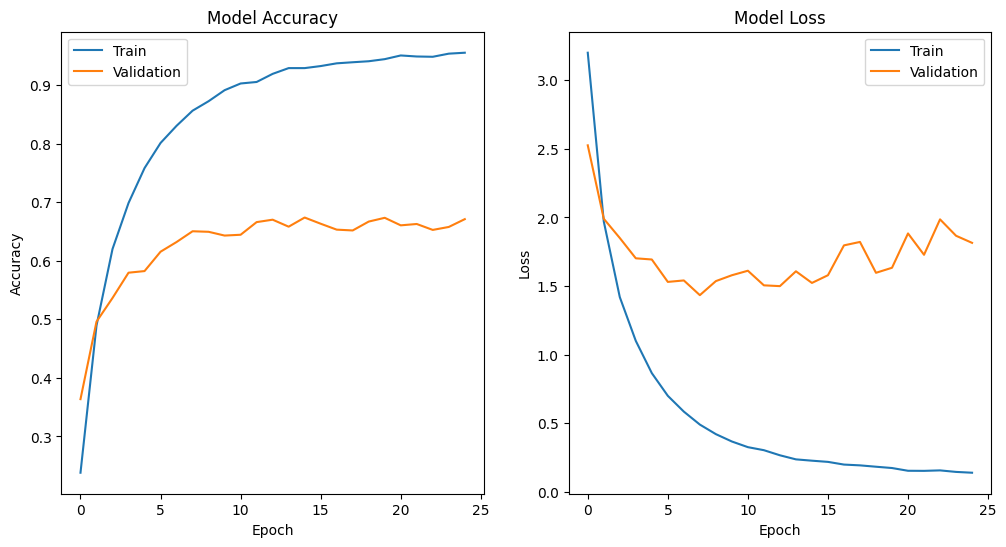

In [17]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [18]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step

E0000 00:00:1725217910.890711 2300662 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725217911.021687 2300662 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 762ms/step
[ 0 10  0 ... 59 24 59]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [19]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.6412
Precision : 0.7235
Recall : 0.6412
F1 Score : 0.6464
Classification Report:
               precision    recall  f1-score   support

         A10       0.85      0.85      0.85        20
       A400M       0.82      0.45      0.58        20
       AG600       1.00      0.65      0.79        20
        AV8B       0.81      0.85      0.83        20
        An72       1.00      0.40      0.57        10
          B1       0.88      0.75      0.81        20
          B2       0.62      0.65      0.63        20
         B21       0.00      0.00      0.00         4
         B52       0.68      0.75      0.71        20
       Be200       0.83      0.71      0.77        14
        C130       0.36      1.00      0.53        20
         C17       0.75      0.75      0.75        20
          C2       0.83      0.95      0.88        20
        C390       1.00      0.38      0.55         8
          C5       0.91      0.50      0.65        20
          E2       0.84      0.80      0

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [20]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[17  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  2  1]
 [ 0  0  0 ...  0  0  4]]


In [6]:
from keras.applications.vgg16 import VGG16, preprocess_input # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

def create_model_VGG(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    # Load VGG16 pretrained model
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freezing layers
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Adding layers on top
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(60, activation='softmax')(top_model)

    # Final model
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Re-compile the model, with last 15 layers unfrozen for Fine-Tuning
model = create_model_VGG((300,300,3), 3, optimizer=Adam(learning_rate=0.0001), fine_tune=15)

# Print model summary
model.summary()


2024-09-02 17:22:09.164562: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 300, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 150, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │        30,780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,979,644 (137.25 MB)

 Trainable params: 35,940,924 (137.10 MB)

 Non-trainable params: 38,720 (151.25 KB)

In [7]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725277950.256257 2529354 service.cc:146] XLA service 0x7fd198017c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725277950.256364 2529354 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-02 17:22:30.344092: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-02 17:22:30.862707: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

238/381 ━━━━━━━━━━━━━━━━━━━━ 3:17 1s/step - accuracy: 0.0522 - loss: 3.9134

2024-09-02 17:28:34.897892: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-02 17:28:52.710823: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[63,128,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[63,128,150,150]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-09-02 17:28:53.136306: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation t

381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0547 - loss: 3.8921

E0000 00:00:1725278601.059951 2529357 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725278601.225801 2529357 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


381/381 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.0547 - loss: 3.8920 - val_accuracy: 0.0726 - val_loss: 3.8474
Epoch 2/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.1104 - loss: 3.6268 - val_accuracy: 0.1614 - val_loss: 3.3989
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.2267 - loss: 3.0669 - val_accuracy: 0.2952 - val_loss: 2.8122
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.3852 - loss: 2.4020 - val_accuracy: 0.4202 - val_loss: 2.2830
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.5222 - loss: 1.8276 - val_accuracy: 0.4740 - val_loss: 2.0293
Epoch 6/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.6167 - loss: 1.4349 - val_accuracy: 0.5471 - val_loss: 1.8329
Epoch 7/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.6872 - loss: 1.1574 - val_accuracy: 0.5862 - val_loss: 1.6937
Epoch 8/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.7395 - loss: 0.9588 - val_accuracy: 0.601

2024-09-02 20:46:27.406464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-02 20:46:30.598149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 581s 1s/step - accuracy: 0.9439 - loss: 0.1867 - val_accuracy: 0.6837 - val_loss: 1.6630
Epoch 23/25


2024-09-02 20:56:08.657713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-02 20:56:09.977517: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.9494 - loss: 0.1687 - val_accuracy: 0.6878 - val_loss: 1.5917
Epoch 24/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 566s 1s/step - accuracy: 0.9491 - loss: 0.1636 - val_accuracy: 0.6864 - val_loss: 1.5922
Epoch 25/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.9489 - loss: 0.1633 - val_accuracy: 0.6855 - val_loss: 1.7224


In [8]:
history_dict = history.history

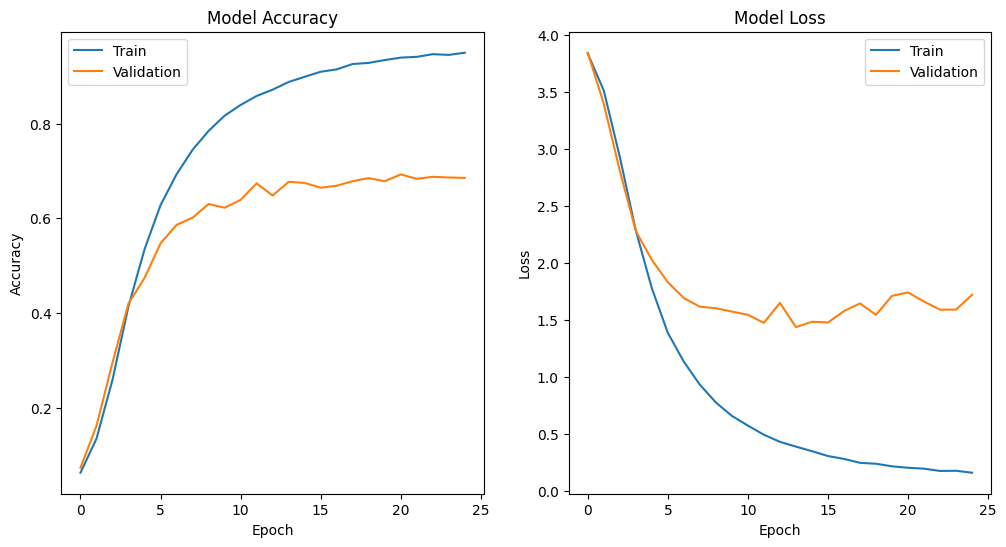

In [9]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [10]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step

E0000 00:00:1725293862.916206 2529356 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725293863.073387 2529356 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 800ms/step
[ 3  0  0 ... 45 24 41]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [11]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.6342
Precision : 0.6744
Recall : 0.6342
F1 Score : 0.6275
Classification Report:
               precision    recall  f1-score   support

         A10       0.82      0.90      0.86        20
       A400M       0.80      0.40      0.53        20
       AG600       1.00      0.60      0.75        20
        AV8B       0.80      0.80      0.80        20
        An72       0.60      0.30      0.40        10
          B1       0.64      0.70      0.67        20
          B2       0.70      0.70      0.70        20
         B21       1.00      0.25      0.40         4
         B52       0.67      0.60      0.63        20
       Be200       0.75      0.64      0.69        14
        C130       0.50      0.80      0.62        20
         C17       0.50      0.75      0.60        20
          C2       0.58      0.95      0.72        20
        C390       0.00      0.00      0.00         8
          C5       0.90      0.45      0.60        20
          E2       0.77      0.85      0

In [13]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[18  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  1  0]
 [ 1  1 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [20]:
from tensorflow.keras.applications import ResNet50 # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

def create_resnet_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    # Load ResNet50 pretrained model
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze base model layers
    if fine_tune > 0:
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in base_model.layers:
            layer.trainable = False

    # Adding custom layers on top
    x = base_model.output
    x = Flatten(name="flatten")(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.25)(x)
    output_layer = Dense(60, activation='softmax')(x)

    # Final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_resnet_model((300, 300, 3), 3, optimizer=Adam(learning_rate=0.0001), fine_tune=7)

# Print model summary
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 306, 306,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 150,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 150,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 152, 152,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 75, 75,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 75, 75,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 75, 75,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 75, 75,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 75, 75,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_3_c

 Total params: 128,476,604 (490.10 MB)

 Trainable params: 108,304,444 (413.15 MB)

 Non-trainable params: 20,172,160 (76.95 MB)

In [21]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.0486 - loss: 4.5943 - val_accuracy: 0.0455 - val_loss: 4.0092
Epoch 2/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.0523 - loss: 3.9531 - val_accuracy: 0.0405 - val_loss: 3.9696
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.0573 - loss: 3.9080 - val_accuracy: 0.0395 - val_loss: 3.9407
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.0589 - loss: 3.8890 - val_accuracy: 0.0395 - val_loss: 3.9343
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.0597 - loss: 3.8646 - val_accuracy: 0.0391 - val_loss: 3.9190
Epoch 6/25
175/381 ━━━━━━━━━━━━━━━━━━━━ 4:26 1s/step - accuracy: 0.0602 - loss: 3.8603

KeyboardInterrupt: 

In [ ]:
history_dict = history.history

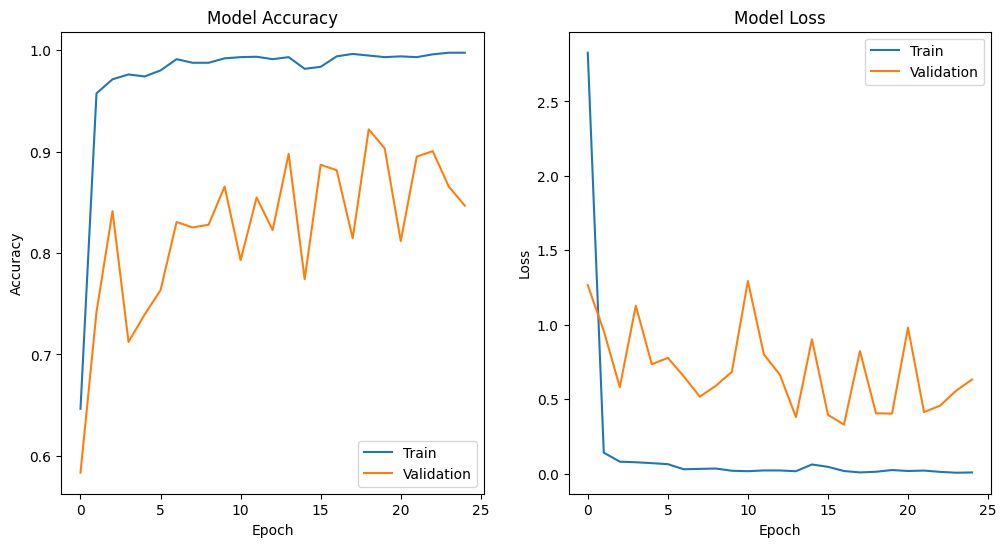

In [ ]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [ ]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 2 2 2 2 2 2 2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.9091
Precision : 0.9286
Recall : 0.9091
F1 Score : 0.9074
Classification Report:
               precision    recall  f1-score   support

       paper       0.79      1.00      0.88        11
        rock       1.00      1.00      1.00        11
    scissors       1.00      0.73      0.84        11

    accuracy                           0.91        33
   macro avg       0.93      0.91      0.91        33
weighted avg       0.93      0.91      0.91        33



In [ ]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[11  0  0]
 [ 0 11  0]
 [ 3  0  8]]
